# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 7

In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [66]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [67]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

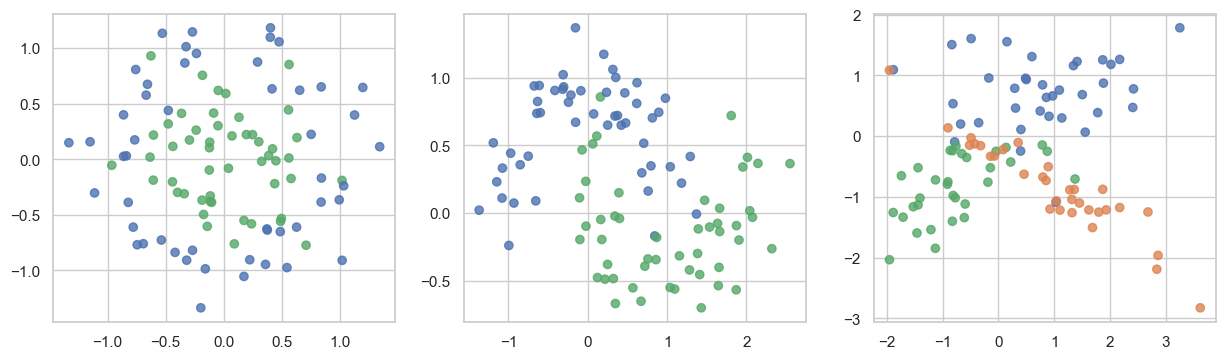

In [68]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [69]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

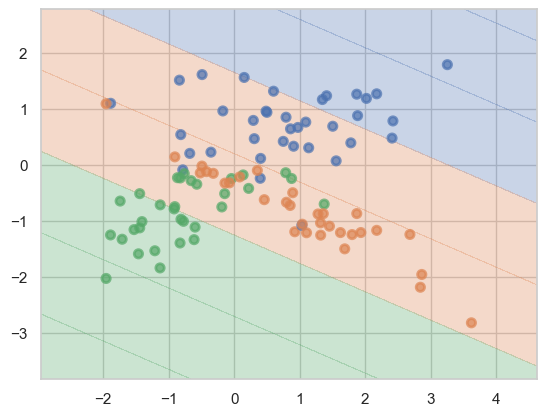

In [70]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

For 0 dataset Train Accuracy: 1.0 
 Test Accuracy: 0.8 
For 1 dataset Train Accuracy: 1.0 
 Test Accuracy: 0.8666666666666667 
For 2 dataset Train Accuracy: 1.0 
 Test Accuracy: 0.8 


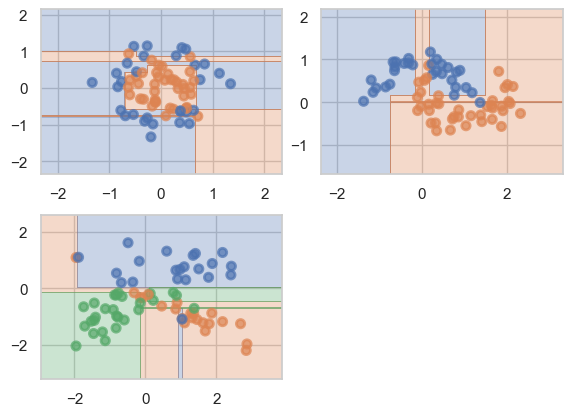

In [71]:
from sklearn.metrics import accuracy_score

for i in range(len(datasets)):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    dtree = DecisionTreeClassifier().fit(X_train, y_train)
    plt.subplot(2, 2, i + 1)
    plot_surface(dtree, X_train, y_train)
    print(f'For {i} dataset Train Accuracy: {accuracy_score(dtree.predict(X_train), y_train)} \n Test Accuracy: {accuracy_score(dtree.predict(X_test), y_test)} ')

    
    

__Ответ:__ Да сильно, учли всю обучающую выборку, ошибка 0, дерево глубокое получается

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

For 1 depth Train Accuracy: 0.8428571428571429 
 Test Accuracy: 0.8 
For 2 depth Train Accuracy: 0.9142857142857143 
 Test Accuracy: 0.9333333333333333 
For 3 depth Train Accuracy: 0.9142857142857143 
 Test Accuracy: 0.9333333333333333 
For 4 depth Train Accuracy: 1.0 
 Test Accuracy: 0.8666666666666667 
For 5 depth Train Accuracy: 1.0 
 Test Accuracy: 0.8666666666666667 
For 6 depth Train Accuracy: 1.0 
 Test Accuracy: 0.8666666666666667 
For 7 depth Train Accuracy: 1.0 
 Test Accuracy: 0.8666666666666667 
For 8 depth Train Accuracy: 1.0 
 Test Accuracy: 0.8666666666666667 


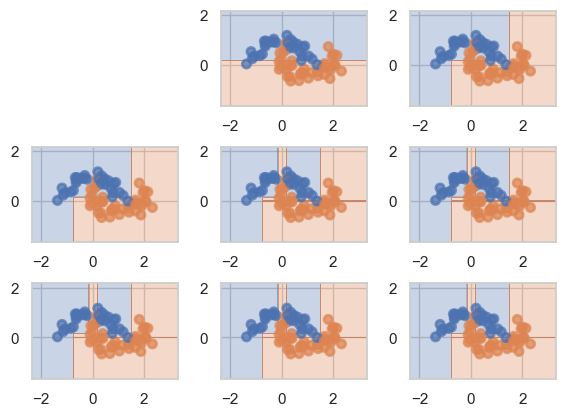

In [72]:
N = 1
for i in range(1, 9):
    X, y = datasets[N]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    dtree = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    plt.subplot(3, 3, i + 1)
    plot_surface(dtree, X_train, y_train)
    print(f'For {i} depth Train Accuracy: {accuracy_score(dtree.predict(X_train), y_train)} \n Test Accuracy: {accuracy_score(dtree.predict(X_test), y_test)} ')


For 1 depth Train Accuracy: 0.6714285714285714 
 Test Accuracy: 0.6 
For 2 depth Train Accuracy: 0.9 
 Test Accuracy: 0.7666666666666667 
For 3 depth Train Accuracy: 0.9428571428571428 
 Test Accuracy: 0.8666666666666667 
For 4 depth Train Accuracy: 0.9571428571428572 
 Test Accuracy: 0.8333333333333334 
For 5 depth Train Accuracy: 0.9714285714285714 
 Test Accuracy: 0.8 
For 6 depth Train Accuracy: 0.9857142857142858 
 Test Accuracy: 0.7666666666666667 
For 7 depth Train Accuracy: 1.0 
 Test Accuracy: 0.8 
For 8 depth Train Accuracy: 1.0 
 Test Accuracy: 0.8333333333333334 


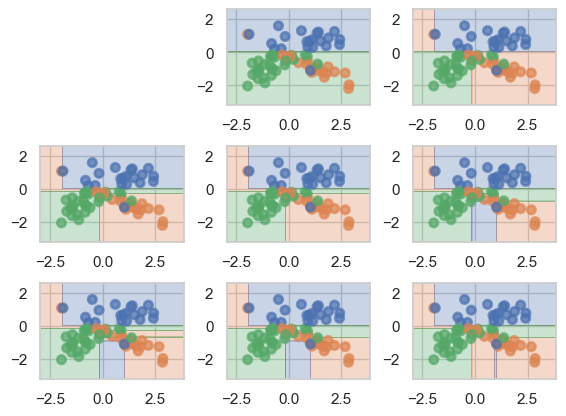

In [73]:
N = 2
for i in range(1, 9):
    X, y = datasets[N]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    dtree = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    plt.subplot(3, 3, i + 1)
    plot_surface(dtree, X_train, y_train)
    print(f'For {i} depth Train Accuracy: {accuracy_score(dtree.predict(X_train), y_train)} \n Test Accuracy: {accuracy_score(dtree.predict(X_test), y_test)} ')


For 1 depth Train Accuracy: 0.7285714285714285 
 Test Accuracy: 0.4666666666666667 
For 2 depth Train Accuracy: 0.8285714285714286 
 Test Accuracy: 0.6333333333333333 
For 3 depth Train Accuracy: 0.8857142857142857 
 Test Accuracy: 0.7333333333333333 
For 4 depth Train Accuracy: 0.9571428571428572 
 Test Accuracy: 0.7 
For 5 depth Train Accuracy: 0.9714285714285714 
 Test Accuracy: 0.7666666666666667 
For 6 depth Train Accuracy: 1.0 
 Test Accuracy: 0.8 
For 7 depth Train Accuracy: 1.0 
 Test Accuracy: 0.7 
For 8 depth Train Accuracy: 1.0 
 Test Accuracy: 0.7333333333333333 


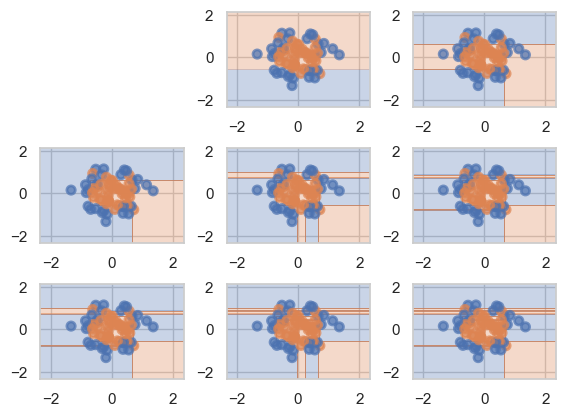

In [74]:
N = 0
for i in range(1, 9):
    X, y = datasets[N]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    dtree = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    plt.subplot(3, 3, i + 1)
    plot_surface(dtree, X_train, y_train)
    print(f'For {i} depth Train Accuracy: {accuracy_score(dtree.predict(X_train), y_train)} \n Test Accuracy: {accuracy_score(dtree.predict(X_test), y_test)} ')


For 1 min sample leaf Train Accuracy: 1.0 
 Test Accuracy: 0.7666666666666667 
For 2 min sample leaf Train Accuracy: 0.9428571428571428 
 Test Accuracy: 0.8666666666666667 
For 3 min sample leaf Train Accuracy: 0.9428571428571428 
 Test Accuracy: 0.7333333333333333 
For 4 min sample leaf Train Accuracy: 0.9 
 Test Accuracy: 0.8666666666666667 
For 5 min sample leaf Train Accuracy: 0.8714285714285714 
 Test Accuracy: 0.9 
For 6 min sample leaf Train Accuracy: 0.8428571428571429 
 Test Accuracy: 0.9 
For 7 min sample leaf Train Accuracy: 0.8285714285714286 
 Test Accuracy: 0.8 
For 8 min sample leaf Train Accuracy: 0.8285714285714286 
 Test Accuracy: 0.8 


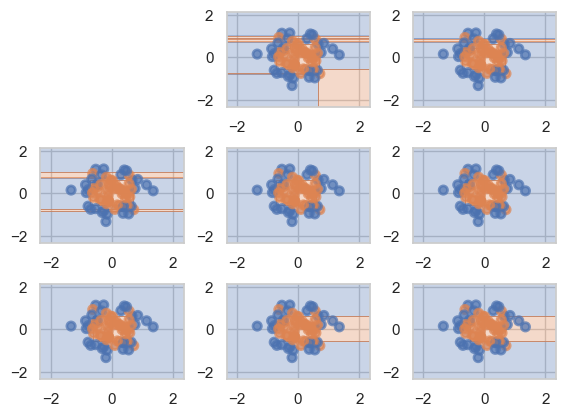

In [75]:
N = 0
for i in range(1, 9):
    X, y = datasets[N]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    dtree = DecisionTreeClassifier(min_samples_leaf=i).fit(X_train, y_train)
    plt.subplot(3, 3, i + 1)
    plot_surface(dtree, X_train, y_train)
    print(f'For {i} min sample leaf Train Accuracy: {accuracy_score(dtree.predict(X_train), y_train)} \n Test Accuracy: {accuracy_score(dtree.predict(X_test), y_test)} ')


For 1 min sample leaf Train Accuracy: 1.0 
 Test Accuracy: 0.8666666666666667 
For 2 min sample leaf Train Accuracy: 0.9857142857142858 
 Test Accuracy: 0.7666666666666667 
For 3 min sample leaf Train Accuracy: 0.9857142857142858 
 Test Accuracy: 0.7666666666666667 
For 4 min sample leaf Train Accuracy: 0.9714285714285714 
 Test Accuracy: 0.7666666666666667 
For 5 min sample leaf Train Accuracy: 0.9571428571428572 
 Test Accuracy: 0.7333333333333333 
For 6 min sample leaf Train Accuracy: 0.9285714285714286 
 Test Accuracy: 0.7 
For 7 min sample leaf Train Accuracy: 0.9 
 Test Accuracy: 0.7 
For 8 min sample leaf Train Accuracy: 0.8714285714285714 
 Test Accuracy: 0.7666666666666667 


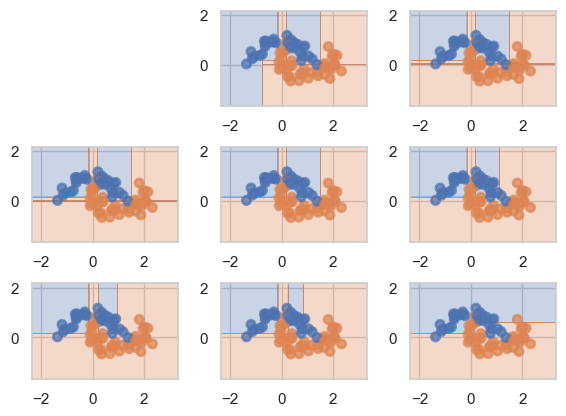

In [76]:
N = 1
for i in range(1, 9):
    X, y = datasets[N]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    dtree = DecisionTreeClassifier(min_samples_leaf=i).fit(X_train, y_train)
    plt.subplot(3, 3, i + 1)
    plot_surface(dtree, X_train, y_train)
    print(f'For {i} min sample leaf Train Accuracy: {accuracy_score(dtree.predict(X_train), y_train)} \n Test Accuracy: {accuracy_score(dtree.predict(X_test), y_test)} ')


For 3 min sample leaf Train Accuracy: 1.0 
 Test Accuracy: 0.8 
For 6 min sample leaf Train Accuracy: 0.9142857142857143 
 Test Accuracy: 0.8 
For 9 min sample leaf Train Accuracy: 0.9142857142857143 
 Test Accuracy: 0.7666666666666667 
For 12 min sample leaf Train Accuracy: 0.9142857142857143 
 Test Accuracy: 0.7666666666666667 
For 15 min sample leaf Train Accuracy: 0.9 
 Test Accuracy: 0.7 
For 18 min sample leaf Train Accuracy: 0.8857142857142857 
 Test Accuracy: 0.7666666666666667 
For 21 min sample leaf Train Accuracy: 0.8857142857142857 
 Test Accuracy: 0.7666666666666667 
For 24 min sample leaf Train Accuracy: 0.8857142857142857 
 Test Accuracy: 0.7666666666666667 


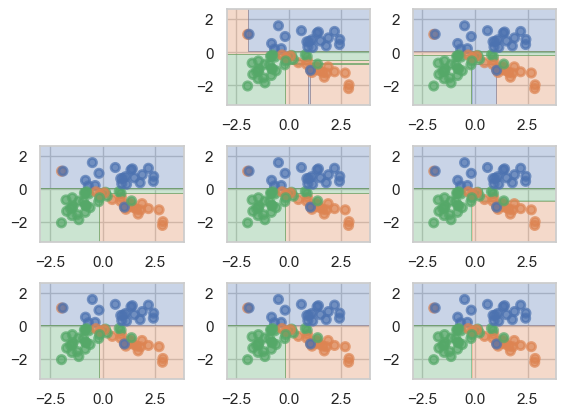

In [77]:
N = 2
for i in range(1, 9):
    X, y = datasets[N]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    dtree = DecisionTreeClassifier(min_samples_leaf=i).fit(X_train, y_train)
    plt.subplot(3, 3, i + 1)
    plot_surface(dtree, X_train, y_train)
    print(f'For {i * 3} min sample leaf Train Accuracy: {accuracy_score(dtree.predict(X_train), y_train)} \n Test Accuracy: {accuracy_score(dtree.predict(X_test), y_test)} ')


__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

https://contest.yandex.ru/contest/72492/run-report/129722333/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

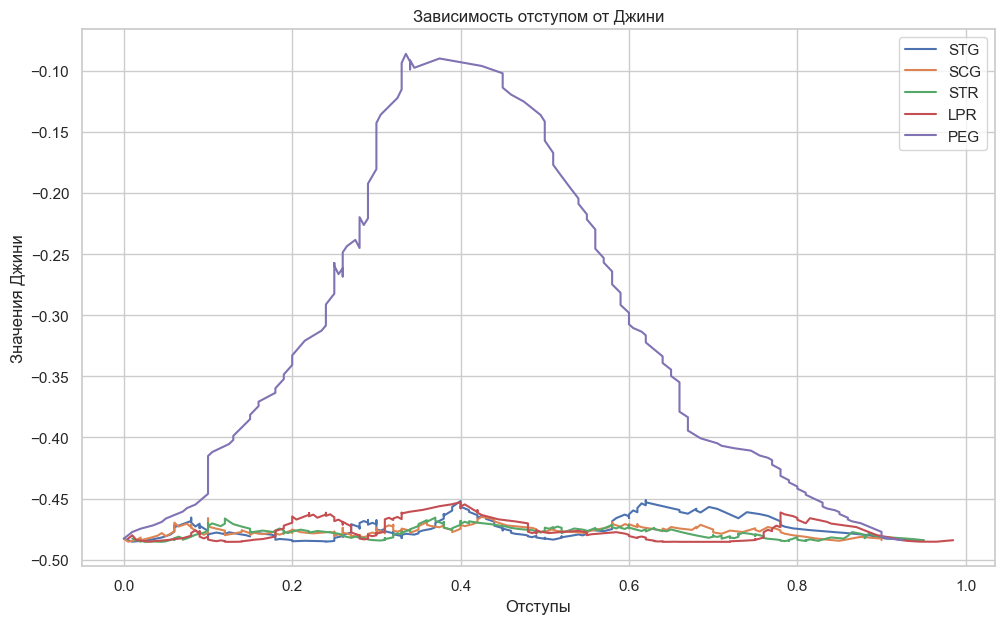

In [78]:
from hw5code import find_best_split

students_df = pd.read_csv('students.csv')

columns = students_df.columns

y = students_df['UNS'].values

x = students_df.drop(columns=['UNS']).values.T



plt.figure(figsize=(10, 6))
for N, i in enumerate(x):
    threshholds, ginis, _, _ = find_best_split(i, y)
    
    #print(len(threshholds) == len(ginis))
    plt.plot(threshholds, ginis, label=columns[N]) 


plt.tight_layout()
plt.xlabel('Отступы')
plt.ylabel('Значения Джини')
plt.title('Зависимость отступом от Джини')
    
plt.legend()


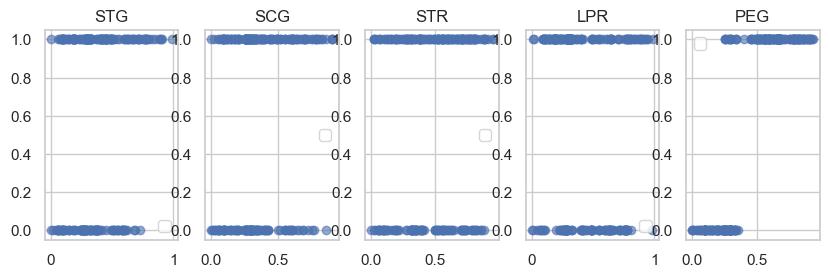

In [79]:
from hw5code import find_best_split

students_df = pd.read_csv('students.csv')

columns = students_df.columns

y = students_df['UNS'].values

x = students_df.drop(columns=['UNS']).values.T



plt.figure(figsize=(10, 6))
for N, i in enumerate(x):
    threshholds, ginis, _, _ = find_best_split(i, y)
    
    plt.subplot(2, 5, N + 1)
    #print(len(threshholds) == len(ginis))
    plt.scatter(i, y, alpha=0.6) 


    plt.title(f'{columns[N]}')
    #plt.xlabel(columns[N])
    #plt.ylabel('UNS')
    plt.legend()

#plt.title('Распределение признака и категорий')
    
plt.legend()


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Эффективнее всего делить выборку по пртзнаку с наибольшей площадью "купола", с наибольшим значением джинни, согласуюся действительно графики скаттерплот. У Хороших признаков более объёмный вытянутый купол. Кривые по плохим признакам близки к линиям. Чем ближе график к перевернутой парабаоле тем круче.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

https://contest.yandex.ru/contest/72492/run-report/129815759/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [114]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.preprocessing import LabelEncoder

from hw5code import DecisionTree

df_m = pd.read_csv('agaricus-lepiota.data')

le = LabelEncoder()

for col in df_m.columns:
    df_m[col] = le.fit_transform(df_m[col])

X = (df_m.drop(columns=['p'])).values

y = df_m['p'].values

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.5, random_state=42)

feature_types = []

for i in range(len(df_m.drop(columns=['p']).columns)):
    feature_types.append("categorical")

tree = DecisionTree(feature_types, max_depth= 4)

tree.fit(X_train, y_train)

answers = tree.predict(X_test)

print(accuracy_score(y_test, answers))


1.0


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

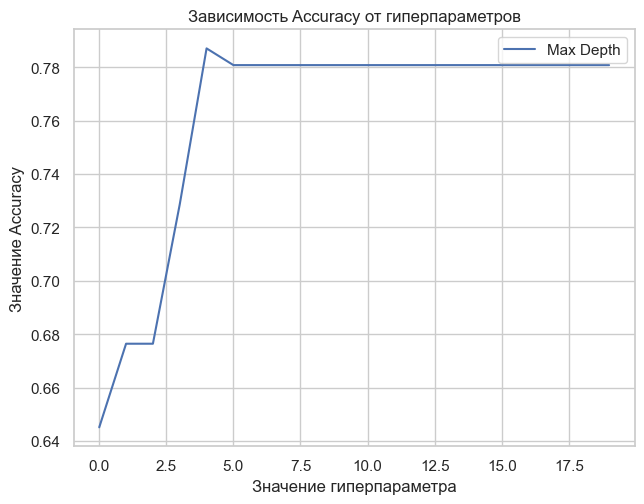

In [123]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.preprocessing import LabelEncoder

from hw5code import DecisionTree

df_m = pd.read_csv('tic-tac-toe-endgame.csv')

le = LabelEncoder()

for col in df_m.columns:
    df_m[col] = le.fit_transform(df_m[col])

X = (df_m.drop(columns=['V10'])).values

y = df_m['V10'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=14)

feature_types = []

for i in range(len(df_m.drop(columns=['V10']).columns)):
    feature_types.append("categorical")

max_depth_diapason = [i for i in range(20)]

min_samples_split_diapason = [i for i in range(0, 1000, 100)]

min_samples_leaf_diapason = [i for i in range(0, 1000, 100)]


min_d_d = []

min_s_s_d = []

min_s_l_d = []

for i in max_depth_diapason:
    tree = DecisionTree(feature_types, max_depth=i)
    tree.fit(X_train, y_train)
    answers = tree.predict(X_test)
    min_d_d.append(accuracy_score(y_test, answers))

for i in min_samples_split_diapason:
     tree = DecisionTree(feature_types, min_samples_split=i)
     tree.fit(X_train, y_train)
     answers = tree.predict(X_test)
     min_s_s_d.append(accuracy_score(y_test, answers))
    
for i in min_samples_leaf_diapason:
     tree = DecisionTree(feature_types, min_samples_leaf=i)
     tree.fit(X_train, y_train)
     answers = tree.predict(X_test)
     min_s_l_d.append(accuracy_score(y_test, answers))
    






plt.plot(max_depth_diapason, min_d_d, label='Max Depth') 

plt.tight_layout()
plt.xlabel('Значение гиперпараметра')
plt.ylabel('Значение Accuracy')
plt.title('Зависимость Accuracy от гиперпараметров')
    
plt.legend()


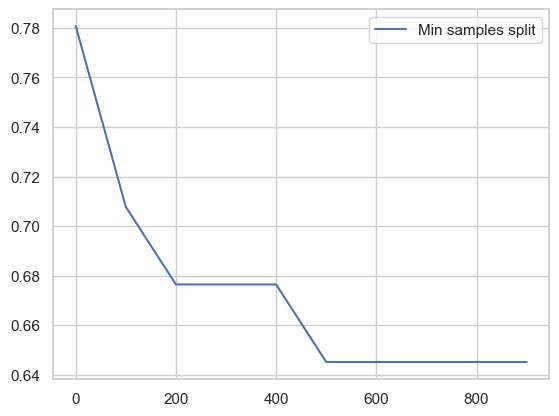

In [124]:
plt.plot(min_samples_split_diapason, min_s_s_d, label='Min samples split') 
plt.legend()

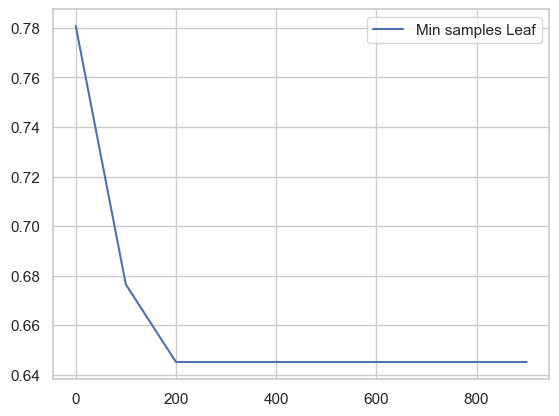

In [125]:
plt.plot(min_samples_leaf_diapason, min_s_l_d, label='Min samples Leaf') 
plt.legend()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [135]:
from sklearn.datasets import fetch_california_housing
from hw5code import LinearRegressionTree
from sklearn.metrics import mean_squared_error


housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=14)

feature_types = []

print(type(X_train))

for i in range(8):
     feature_types.append("real")
     
tree = LinearRegressionTree(feature_types)

tree.fit(X_train, y_train)

answers = tree.predict(X_test)

print(mean_squared_error(y_test, answers))


[autoreload of hw5code failed: Traceback (most recent call last):
  File "c:\Users\ANDREW_LOCAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\ANDREW_LOCAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\ANDREW_LOCAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Users\ANDREW_LOCAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\extensions\autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ANDREW_LOCAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a,

(20640, 8) (20640,)
<class 'numpy.ndarray'>
0.5287831440617823


Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [126]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

# YOUR CODE

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

Libere me domine de morte aeterna